## Data Load

In [1]:
# 해당 사이트 (https://github.com/crong-k/pyqsar_tutorial)에서도 pyqsar 모듈 설치할 수 있음.

# pyqsar module 불러오기
import sys
sys.path.append("/data/wjddns037/QSAR_project/pyqsar3")
import pyqsar

In [2]:
import pandas as pd
csv_file_name = "/data/wjddns037/QSAR_project/QSAR_input_file.csv"
sample_data = pd.read_csv(csv_file_name, sep = ",")
X_data = sample_data.iloc[:, 1:-1] # Descriptors
y_data = sample_data.iloc[:, -1:] # End point (우리가 예측하고자 하는 값)

In [3]:
# Check X_data
X_data.head() # row : molecular, column : descriptors

,nAcid,ALogP,ALogp2,AMR,apol,naAromAtom,nAromBond,nAtom,nHeavyAtom,nH,...,AMW,WTPT-1,WTPT-2,WTPT-3,WTPT-4,WTPT-5,WPATH,WPOL,XLogP,Zagreb
0,0,-0.6690,0.447561,14.9925,34.309930,12,12,27,17,10,...,8.225160,35.286687,2.075687,9.223862,2.600706,6.623156,494,27,4.266,90
1,0,-0.3044,0.092659,65.8150,50.250481,6,6,43,26,17,...,8.421493,53.442282,2.055472,19.341388,5.169946,7.032175,1718,46,3.004,146
2,0,-0.5912,0.349517,13.6081,35.579102,12,12,30,16,14,...,7.136646,32.470255,2.029391,5.562570,5.562570,0.000000,496,19,4.240,76
3,0,-0.6028,0.363368,8.8959,32.485516,12,12,27,15,12,...,7.410509,30.472053,2.031470,5.590274,5.590274,0.000000,394,18,3.875,72
4,0,-0.6348,0.402971,7.4415,30.789930,12,12,25,15,10,...,7.923173,30.405693,2.027046,8.610094,2.558401,6.051693,394,18,2.970,72


In [4]:
X_data.shape # 97개의 분자, 1444개의 descriptor로 구성

(97, 1444)

In [5]:
# Check y_data
y_data.head()

,EP
0,3.159894
1,2.263365
2,2.204328
3,3.283997
4,2.459545


In [6]:
y_data.shape

(97, 1)

In [7]:
import pyqsar
from pyqsar import data_tools as dt

## Data Filtering

In [8]:
X_data.shape

(97, 1444)

In [9]:
# Remove empty feature.
X_data = dt.rm_empty_feature(X_data)

In [10]:
X_data.shape

(97, 1188)

In [11]:
# Remove NaN.
X_data = dt.rmNaN(X_data)

In [12]:
X_data.shape # 97개의 분자, 1188개의 descriptors

(97, 1188)

## Widget for data

In [13]:
# Search descriptors.
dt.SearchFeature(X_data)

Text(value='')

Button(description='Search', style=ButtonStyle())

In [14]:
# Get scatter matrix
%matplotlib inline
dt.ScatterMatrix(X_data)

SelectMultiple(description='Selected Features:', options=('ALogP', 'ALogp2', 'AMR', 'apol', 'naAromAtom', 'nAr…

Button(description='Get scatter matrix', style=ButtonStyle())

## Data scaling

In [15]:
from sklearn.preprocessing import MinMaxScaler
header = list(X_data.columns.values)
scaler = MinMaxScaler()
X_data_scaled = scaler.fit_transform(X_data)
X_data = pd.DataFrame(X_data_scaled, columns = header)

In [16]:
# Check X_data.
X_data.head()

,ALogP,ALogp2,AMR,apol,naAromAtom,nAromBond,nAtom,nHeavyAtom,nH,nC,...,AMW,WTPT-1,WTPT-2,WTPT-3,WTPT-4,WTPT-5,WPATH,WPOL,XLogP,Zagreb
0,0.641568,0.017688,0.073855,0.170645,0.363636,0.324324,0.146667,0.157895,0.125,0.233333,...,0.444194,0.176767,0.935933,0.091729,0.095623,0.260534,0.036807,0.188406,0.443960,0.182692
1,0.695514,0.003518,0.570940,0.346731,0.181818,0.162162,0.360000,0.394737,0.300,0.400000,...,0.484206,0.405126,0.838590,0.345212,0.190090,0.276623,0.165527,0.463768,0.338248,0.451923
2,0.653079,0.013773,0.060314,0.184665,0.363636,0.324324,0.186667,0.131579,0.225,0.233333,...,0.222363,0.141342,0.713000,0.000000,0.204526,0.000000,0.037018,0.072464,0.441783,0.115385
3,0.651363,0.014326,0.014225,0.150492,0.363636,0.324324,0.146667,0.105263,0.175,0.200000,...,0.278174,0.116209,0.723012,0.000694,0.205544,0.000000,0.026291,0.057971,0.411208,0.096154
4,0.646628,0.015908,0.000000,0.131762,0.363636,0.324324,0.120000,0.105263,0.125,0.166667,...,0.382652,0.115375,0.701709,0.076352,0.094068,0.238054,0.026291,0.057971,0.335400,0.096154


## Feature clustering for feature selection

In [17]:
from pyqsar import clustering as cl # Hirechical clustering

# Calculate cophenetic correlation coefficient.
cl.cophenetic(X_data)

average linkage cophenet: 0.8468054073563105
complete linkage cophenet: 0.8506038843755379
single linkage cophenet: 0.3572046169401419


In [18]:
# clustering
clust = cl.FeatureCluster(X_data, "average", 2) # Descriptor, linkage cophenet, depth
clust_info = clust.set_cluster()


 Cluster 1 ['Kier3', 'nRotB'] 
 Cluster 2 ['nRotBt'] 
 Cluster 3 ['nH', 'nBondsS2'] 
 Cluster 4 ['CIC0'] 
 Cluster 5 ['AMR', 'nBondsS3'] 
 Cluster 6 ['ETA_EtaP'] 
 Cluster 7 ['LipoaffinityIndex'] 
 Cluster 8 ['MLogP'] 
 Cluster 9 ['ATS2s'] 
 Cluster 10 ['ATSC0i'] 
 Cluster 11 ['sumI'] 
 Cluster 12 ['SPC-4', 'SPC-5', 'SPC-6', 'GGI2', 'GGI3'] 
 Cluster 13 ['SC-3', 'ETA_Eta_B_RC', 'GGI1'] 
 Cluster 14 ['ATS3s', 'ATS5s'] 
 Cluster 15 ['ATS4s'] 
 Cluster 16 ['SpMax6_Bhs', 'SpMax7_Bhs'] 
 Cluster 17 ['SpMax8_Bhs'] 
 Cluster 18 ['SpMin8_Bhe', 'SpMin8_Bhi'] 
 Cluster 19 ['SpAbs_Dzs', 'SpMax_Dzs', 'SpDiam_Dzs', 'SpAD_Dzs', 'EE_Dzs'] 
 Cluster 20 ['SpMAD_Dzs'] 
 Cluster 21 ['ETA_Beta', 'ETA_Eta_F_L'] 
 Cluster 22 ['ETA_Eta_F'] 
 Cluster 23 ['MWC5', 'MWC6', 'MWC7', 'MWC8', 'MWC9', 'MWC10', 'SRW8', 'SRW10', 'TSRW'] 
 Cluster 24 ['SP-5', 'SP-6', 'SP-7', 'fragC', 'MPC4', 'MPC5', 'MPC6', 'MPC7', 'MPC8', 'MPC9', 'MPC10', 'TPC'] 
 Cluster 25 ['piPC2'] 
 Cluster 26 ['SpMAD_Dt'] 
 Cluster 27 ['IC2'] 
 C

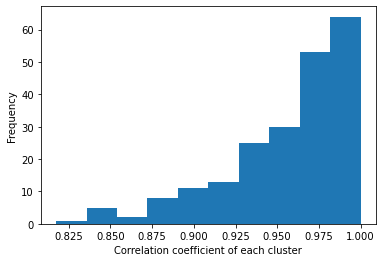

In [19]:
# Check how to cluster well.
clust.cluster_dist()

## Feature selection using single core

In [20]:
from pyqsar import feature_selection_single as fss
select = fss.selection(X_data, y_data, # Descriptor data, End Point data
                       clust_info, # Cluster infomation
                       model = "regression",
                       learning = 1000, # 모델을 만드는 데에 몇 번 학습할 것인가?
                       bank = 200, # Genetic Algorithms에서 사용하는 bank size
                       component = 10) # 최종적으로 몇 개의 feature를 선정할 것인가?

Start time :  18:02:03
Regression
1000 => 18:05:09 [0.8258730324539796, ['ETA_Epsilon_4', 'MPC7', 'SpDiam_Dzs', 'SpMax3_Bhs', 'SpMin5_Bhp', 'VR2_Dzs', 'maxHBint3', 'nF12Ring', 'nHBint4', 'sumI']]
[0.8258730324539796, ['ETA_Epsilon_4', 'MPC7', 'SpDiam_Dzs', 'SpMax3_Bhs', 'SpMin5_Bhp', 'VR2_Dzs', 'maxHBint3', 'nF12Ring', 'nHBint4', 'sumI']]
Model's cluster info [357, 24, 19, 537, 33, 196, 96, 210, 105, 11]
Finish time :  18:05:09


In [21]:
select

['ETA_Epsilon_4',
 'MPC7',
 'SpDiam_Dzs',
 'SpMax3_Bhs',
 'SpMin5_Bhp',
 'VR2_Dzs',
 'maxHBint3',
 'nF12Ring',
 'nHBint4',
 'sumI']

## Export model

In [22]:
from pyqsar import export_model as em
feature_set = select
mymodel = em.ModelExport(X_data, y_data, feature_set)

In [23]:
# Check selected descriptors.
mymodel.features_table()

,ETA_Epsilon_4,MPC7,SpDiam_Dzs,SpMax3_Bhs,SpMin5_Bhp,VR2_Dzs,maxHBint3,nF12Ring,nHBint4,sumI,EP
0,0.228189,0.231707,0.066966,0.193607,0.375760,0.099934,0.000000,0.0,0.000000,0.089017,3.159894
1,0.611483,0.573171,0.206074,0.893038,0.663265,0.156370,0.000000,1.0,0.000000,0.447607,2.263365
2,0.117505,0.085366,0.064122,0.181305,0.375760,0.038101,0.000000,0.0,0.000000,0.057106,2.204328
3,0.135938,0.089431,0.039287,0.144469,0.375760,0.069017,0.000000,0.0,0.000000,0.041989,3.283997
4,0.184891,0.073171,0.052136,0.195547,0.358405,0.046081,0.000000,0.0,0.000000,0.057106,2.459545
...,...,...,...,...,...,...,...,...,...,...,...
92,0.118152,0.654472,0.217548,0.195513,0.817253,0.313170,0.000000,0.0,0.000000,0.300644,8.537602
93,0.215541,0.109756,0.060082,0.000000,0.488938,0.088856,0.000000,0.0,0.000000,0.027837,4.236572
94,0.380056,0.227642,0.211756,0.472920,0.699139,0.323360,0.000000,0.0,0.272727,0.359429,5.086186
95,0.419253,0.158537,0.257514,0.677320,0.673902,0.074081,0.000000,0.0,0.090909,0.384623,5.795880


,ETA_Epsilon_4,MPC7,SpDiam_Dzs,SpMax3_Bhs,SpMin5_Bhp,VR2_Dzs,maxHBint3,nF12Ring,nHBint4,sumI,EP
ETA_Epsilon_4,1.000000,-0.143991,-0.085788,0.453089,-0.325549,-0.064497,0.191551,0.111825,0.148581,0.151540,-0.053025
MPC7,-0.143991,1.000000,0.738874,0.396640,0.767265,0.331190,-0.106197,0.045383,-0.150173,0.780581,0.639441
SpDiam_Dzs,-0.085788,0.738874,1.000000,0.480895,0.738907,0.099818,0.016553,-0.096905,-0.146665,0.858289,0.550880
SpMax3_Bhs,0.453089,0.396640,0.480895,1.000000,0.417029,0.185618,0.202878,0.047297,0.078606,0.741444,0.378643
SpMin5_Bhp,-0.325549,0.767265,0.738907,0.417029,1.000000,0.262277,0.108026,-0.062150,-0.091599,0.780344,0.734666
VR2_Dzs,-0.064497,0.331190,0.099818,0.185618,0.262277,1.000000,-0.045341,-0.056692,-0.010413,0.272933,0.306255
maxHBint3,0.191551,-0.106197,0.016553,0.202878,0.108026,-0.045341,1.000000,-0.084375,0.297490,0.149963,0.188756
nF12Ring,0.111825,0.045383,-0.096905,0.047297,-0.062150,-0.056692,-0.084375,1.000000,-0.081233,-0.062765,-0.302841
nHBint4,0.148581,-0.150173,-0.146665,0.078606,-0.091599,-0.010413,0.297490,-0.081233,1.000000,-0.008582,-0.182903
sumI,0.151540,0.780581,0.858289,0.741444,0.780344,0.272933,0.149963,-0.062765,-0.008582,1.000000,0.589954


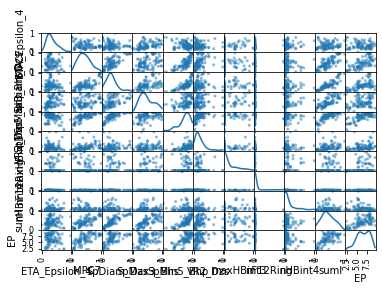

In [24]:
# Check correlation between selected descriptors.
mymodel.model_corr()

In [25]:
# Multi-Linear regression
mymodel.mlr()

Model features:  ['ETA_Epsilon_4', 'MPC7', 'SpDiam_Dzs', 'SpMax3_Bhs', 'SpMin5_Bhp', 'VR2_Dzs', 'maxHBint3', 'nF12Ring', 'nHBint4', 'sumI']
Coefficients:  [[  5.60612656   3.89887724   2.94061039   2.08282137   9.9699693
    1.57346852   1.35513287  -4.9768823   -1.69899095 -11.27850098]]
Intercept:  [-2.25224737]
RMSE: 0.800338
R^2: 0.825873


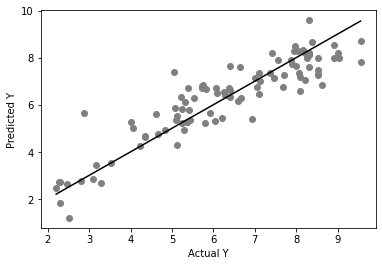

In [26]:
# 어떻게 데이터가 분포되어 있는지를 그래프를 통해 확인
mymodel.train_plot()

In [27]:
mymodel.train_plot_inter()

Loading BokehJS ...

## Cross validation

R^2CV mean: 0.828998
Q^2CV mean: 0.799841
RMSE CV : 0.864229
Features set = ['ETA_Epsilon_4', 'MPC7', 'SpDiam_Dzs', 'SpMax3_Bhs', 'SpMin5_Bhp', 'VR2_Dzs', 'maxHBint3', 'nF12Ring', 'nHBint4', 'sumI']
Model coeff =  [[  4.22963766   4.02076262   2.78432147   2.3488102    9.11816439
    1.37495662   1.36699634  -5.0511172   -1.88321118 -11.52194941]]
Model intercept =  [-1.27543457]


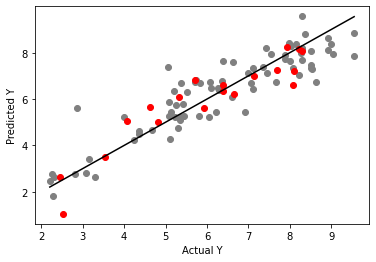

In [28]:
# K-fold cross validation
from pyqsar import cross_validation as cv
cv.k_fold(X_data, y_data, feature_set, k = 5, run = 1000) # k-1 개는 training set, 1개는 validation set.
# 빨간 색 점은 Test set의 분포, 회색 점은 cross-validation에서 사용하는 Trainning set의 분포.

## Draw molecule

In [29]:
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw
from pyqsar import draw_mol as dm

In [30]:
def Get_index_Mol(ms, index_list):
    temp_ms = []
    for i in index_list:
        temp_ms.append(ms[i])
    return temp_ms

In [31]:
sdf_file_name = "/data/wjddns037/QSAR_project/PTP-1B_inhibitors.sdf"
suppl = Chem.SDMolSupplier(sdf_file_name)
ms = [x for x in suppl if x is not None]
for m in ms:
    tmp = AllChem.Compute2DCoords(m)

In [32]:
# Cross-validation 과정에서 얻은 QSAR 모델을 사용해 Square of error을 계산
y_pred = - 1.27543457 + 4.22963766 * X_data["ETA_Epsilon_4"] + 4.02076262 * X_data["MPC7"] + 2.78432147 * X_data["SpDiam_Dzs"] + 2.3488102 * X_data["SpMax3_Bhs"] + 9.11816439 * X_data["SpMin5_Bhp"] + 1.37495662 * X_data["VR2_Dzs"] + 1.36699634 * X_data["maxHBint3"] - 5.0511172 * X_data["nF12Ring"] - 1.88321118 * X_data["nHBint4"] - 11.52194941 * X_data["sumI"]
loss = (y_pred - y_data["EP"]) ** 2

In [33]:
# Square of error의 값이 3보다 큰 값들을 outlier로 정의
index = loss[loss > 3].index.tolist() # 선택한 outlier의 번호를 입력
mols = Get_index_Mol(ms, index)
img = Draw.MolsToGridImage(mols,
                           molsPerRow = 3,
                           subImgSize = (300, 300),
                           legends = [x.GetProp("_Name") for x in mols])

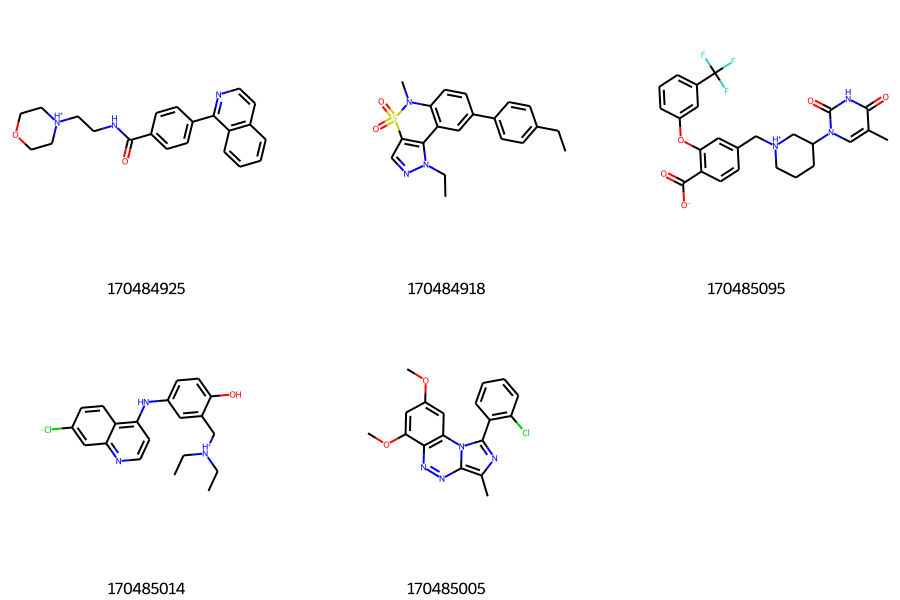

In [34]:
img # compound CID 번호와, 2차원 구조를 보여준다.

In [35]:
# Outlier들의 공통 구조를 확인
draw = dm.DrawMols(sdf_file_name)
commonsub = draw.common_substr(index = index)

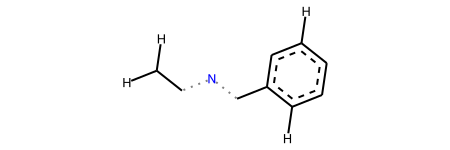

In [36]:
draw.show_substr(commonsub)